In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from elo_rationg import Individual

## 環境生成

In [4]:
a = Individual("a")
b = Individual("b")
c = Individual("c")
d = Individual("d")
e = Individual("e")
f = Individual("f")

players = [a, b, c, d, e, f]

# 勝敗シミュレーション用関数
def simulate(player_a, player_b):
    players = dict(
        a=Individual("a", rate=2000),
        b=Individual("b", rate=1800),
        c=Individual("c", rate=1600),
        d=Individual("d", rate=1400),
        e=Individual("e", rate=1200),
        f=Individual("f", rate=1000),
    )

    return players[player_a].win_rate(players[player_b]) >= np.random.random()


## シミュレーション

In [5]:
n = 2000  # 試合数
logs = []  # ratingの変化を記録する配列

np.random.seed(43)
for _ in tqdm(range(n)):
    # ランダムにシミュレーションするplayerを選択
    player_a, player_b = np.random.choice(players, 2, replace=False)
    
    # 実際のレーティングをもとに勝敗をシミュレーション
    is_a_win = simulate(player_a.name, player_b.name)

    player_a.update_rate(player_b, n_wins=is_a_win, n_games=1)
    player_b.update_rate(player_a, n_wins=1-is_a_win, n_games=1)

    # 記録
    log_data = {player.name: player.rate for player in players}
    log_data["player_a"] = player_a.name
    log_data["player_b"] = player_b.name
    log_data["win"] = player_a if is_a_win else player_b
    log_data["is_a_win"] = is_a_win
    logs.append(log_data)

# logをDataFrameに変換
result = pd.DataFrame(logs)

  0%|          | 0/2000 [00:00<?, ?it/s]

## 可視化

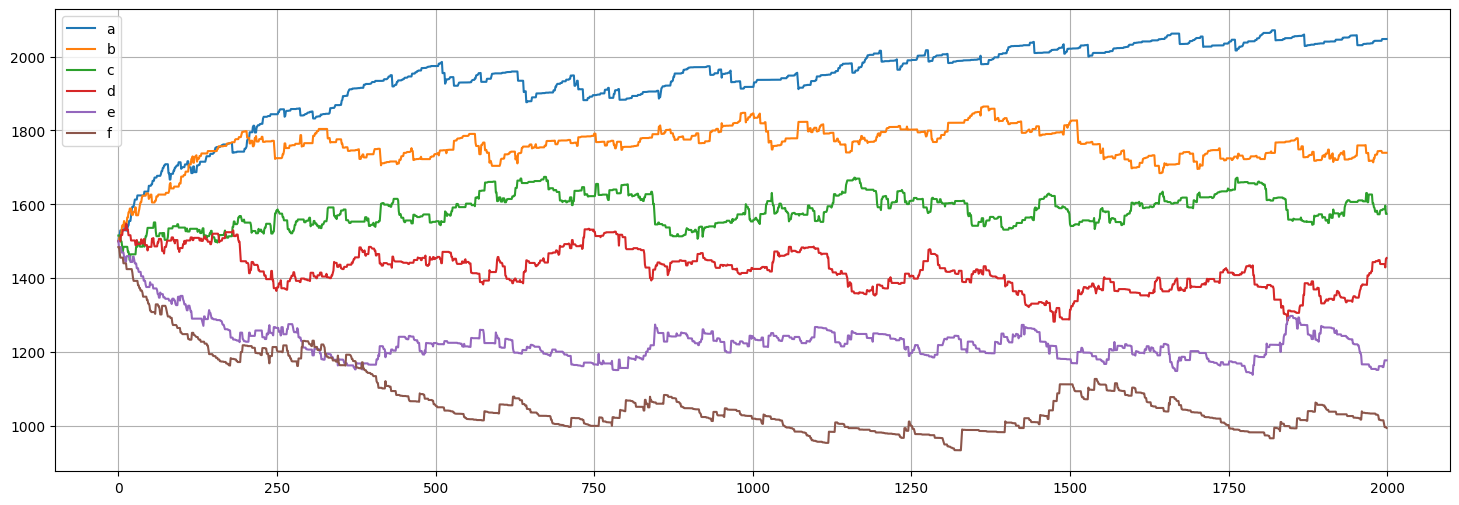

In [6]:
fig, ax = plt.subplots(figsize=(18, 6))

result[[p.name for p in players]].plot(kind="line", ax=ax)

ax.grid()

## debug

In [7]:
a = Individual("a", 2000, verbose=True)
b = Individual("b", 1600, verbose=True)

a.update_rate(b, n_games=1, n_wins=1)

2023-08-23 23:22:01,722 - INFO:elo_rationg.individual.a - Updating rating of a bases on results of the match against b.rating a: 2000 - b: 1600
2023-08-23 23:22:01,723 - INFO:elo_rationg.individual.a - Win rate of a: 0.9090909090909091.
2023-08-23 23:22:01,724 - INFO:elo_rationg.individual.a - The number of games: 1.
2023-08-23 23:22:01,725 - INFO:elo_rationg.individual.a - The number of A wins: 1 
2023-08-23 23:22:01,726 - INFO:elo_rationg.individual.a - Updated rating of a.
2023-08-23 23:22:01,726 - INFO:elo_rationg.individual.a -  2000.000 ->  2002.909
